# Mushroom Dataset
#### Data Description
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.`

### Importing Required Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,zscore
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading dataset

In [89]:
df = pd.read_csv('mushroom.csv')

pd.set_option("display.max_columns",None)

In [90]:
# Executing the first 6 rows
df.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


As we see here,whole the data in categorical form .So there is need for encoding the categorical data into numerical data so that the we can send data for training and testing in different algorithms.But before doing that we are going to check the dimensions,and the missing values from the dataset.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Our dataset contains total 81124 rows and 23 columns which also include 1 targert column and out of 23 columns all are categorical in nature.

In [92]:
# Let's check null or missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


There is no null or missing values in our datset.We can now procede for further step of checking the values in each column.

### Attributes Information

Target -->class: edible=e, poisonous=p)

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
3. cap-color: brown=n ,buff=b, cinnamon=c, gray=g ,green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. gill-attachment: attached=a ,descending=d ,free=f ,notched=n
7. gill-spacing: close=c ,crowded=w ,distant=d
8. gill-size: broad=b ,narrow=n
9. gill-color: black=k ,brown=n ,buff=b ,chocolate=h ,gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. stalk-shape: enlarging=e ,tapering=t
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
13. stalk-surface-below-ring: fibrous=f ,scaly=y, silky=k, smooth=s
14. stalk-color-above-ring: brown=n ,buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c ,gray=g, orange=o, pink=p ,red=e ,white=w ,yellow=y
16. veil-type: partial=p ,universal=u
17. veil-color: brown=n, orange=o, white=w, yellow=y
18. ring-number: none=n, one=o, two=t
19. ring-type: cobwebby=c, evanescent=e, flaring=f ,large=l, none=n, pendant=p, sheathing=s, zone=z
20. spore-print-color: black=k ,brown=n ,buff=b ,chocolate=h ,green=r, orange=o, purple=u, white=w, yellow=y
21. population: abundant=a ,clustered=c ,numerous=n, scattered=s, several=v, solitary=y
22. habitat: grasses=g ,leaves=l ,meadows=m, paths=p, urban=u ,waste=w, woods=d

In [93]:
# Let's check the values in columns
print(df['class'].unique())

['p' 'e']


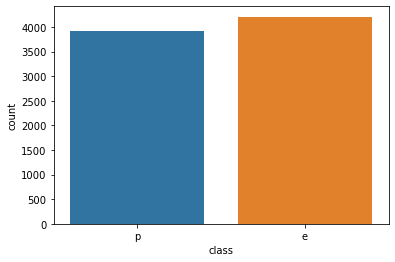

In [94]:
sns.countplot(df['class'],data=df)

By using the countplot we can see that our target data is balanced,which is a good for providing better accuracy of prediction

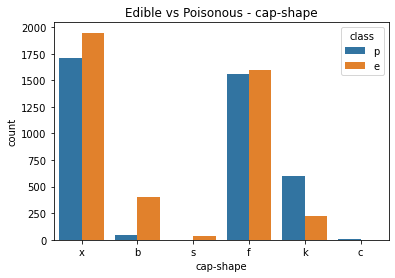

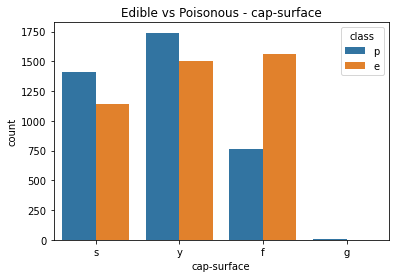

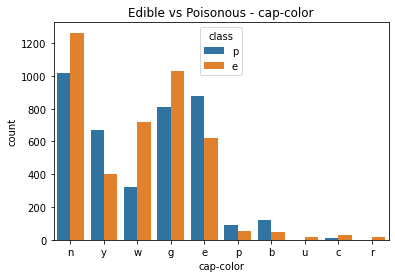

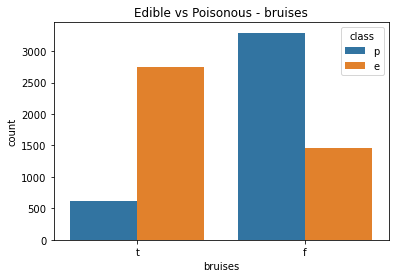

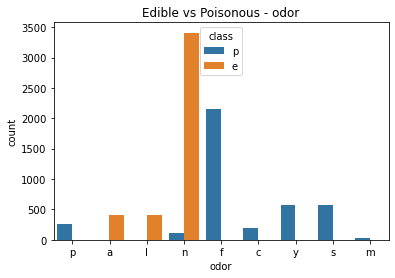

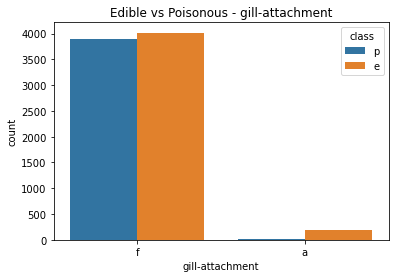

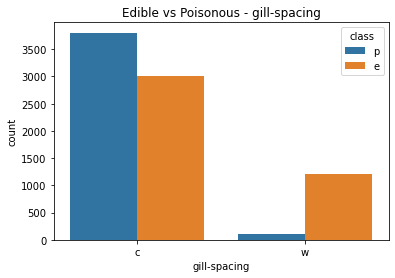

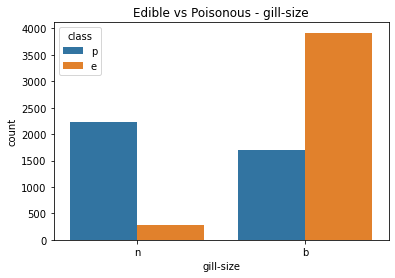

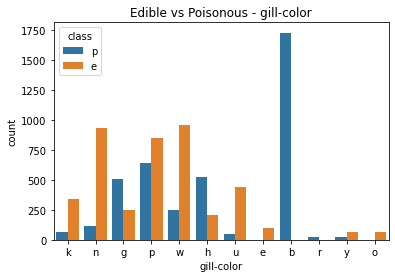

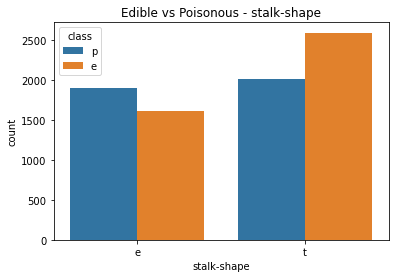

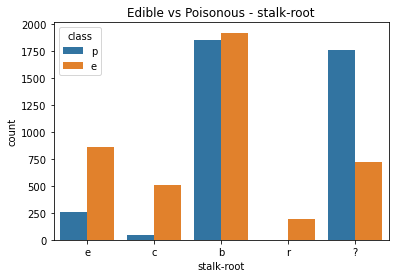

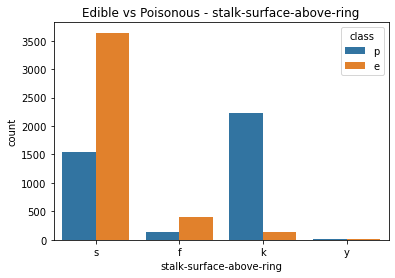

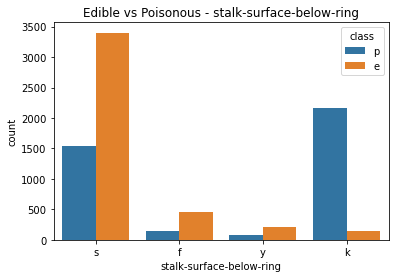

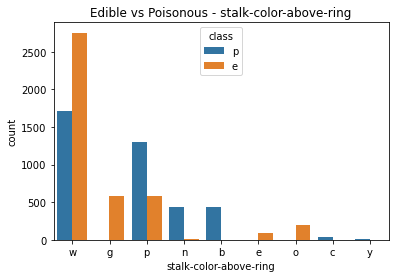

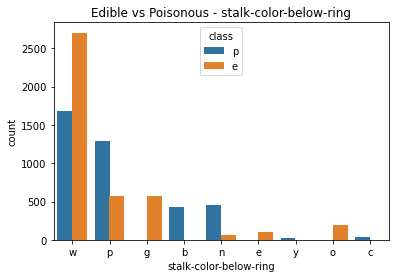

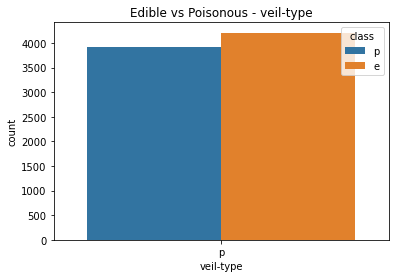

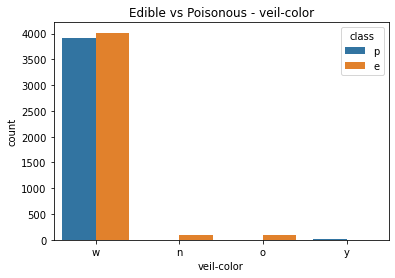

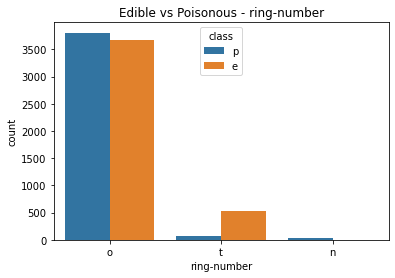

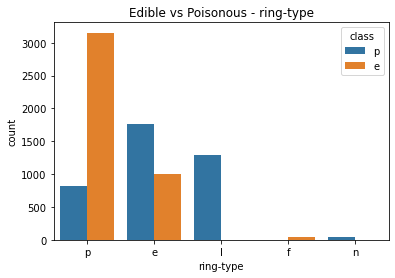

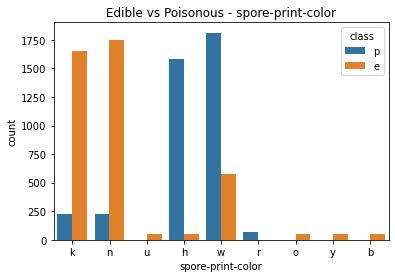

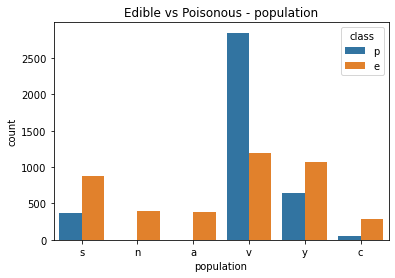

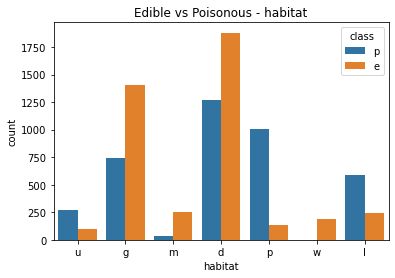

In [95]:
for column in df.columns[1:]:
    sns.countplot(x=column,hue="class",data=df)
    plt.title("Edible vs Poisonous - " + column)
    plt.show()

After seeing the graphs we can find that some features are heplings us in classification.Like `odor` ,in odor we can see clearly the classification of odor with class of mushroom `edible` or `poisonous` . p(pungent) denotes edible, a(almond) denotes poisonous, l(anise) denotes poisonous,n(none) deontes more of edible than poisonous,and rest of f(foul),c(creosote) ,y(fishy),s(spicy),m(musty) all denotes poisonous.

In [96]:
df.groupby('odor')['class'].unique()

odor
a       [e]
c       [p]
f       [p]
l       [e]
m       [p]
n    [e, p]
p       [p]
s       [p]
y       [p]
Name: class, dtype: object

## Data Preparation
#### Drop Unnecessary columns

In [97]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

As From the bivariate analysis we see that`veil-type` contains only 1 value in which both `edible` and `poisonous` class of mushroom is present.So it is not giving any usefull information to us.We can drop this column

In [98]:
df.drop(columns=['veil-type'], axis=1, inplace=True)

### Converting the datatypes

To work on our data,now we need to convert the categorical data into the numerical data.This can be done using the techinque of OrdinalEncoder

In [99]:
from sklearn.preprocessing import OrdinalEncoder

In [100]:
encoder = OrdinalEncoder()
df = pd.DataFrame(encoder.fit_transform(df), columns= df.columns)
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,7.0,7.0,2.0,1.0,0.0,3.0,0.0,1.0


So now we have converted all the categorical features into numerical features.

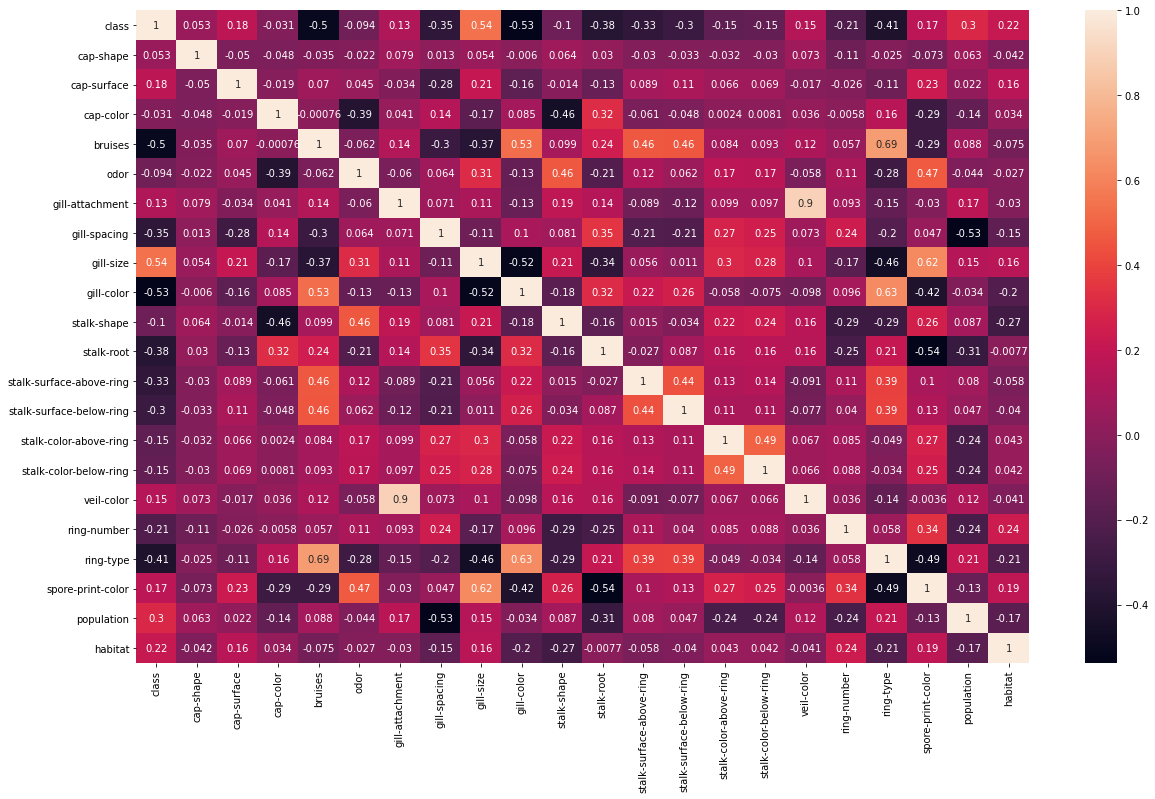

In [101]:
# Let's see the correlation -->Multivariate analysis
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Seeing the correlation graph we can say that `cap-shape` and `cap-color` have a very low level of correlation with our target variable and also most of the variables are not soo much highly correlated with the target variable. 

### Let's check data distribution among all 

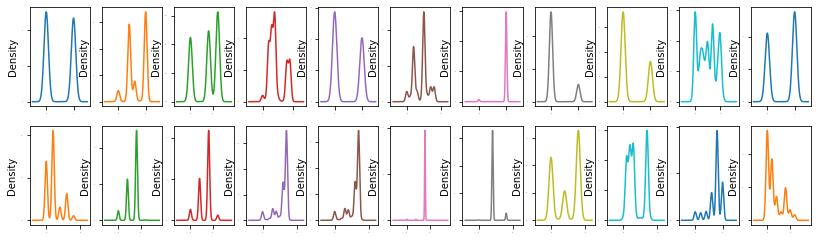

<Figure size 432x288 with 0 Axes>

In [102]:
df.plot(kind='density', subplots=True, layout=(2,11), 
        figsize=(14,4),sharex=False, fontsize=1, legend=False)
plt.show()
plt.tight_layout()

From the density graphs we can see that some skewness is present in some of the variables.Let's check the level of skewness of each column.

In [103]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

By using the skew method ,we can see that some of the columns are highly skewed like `gill-attachment` ,`veil-color`,`ring-number` and a few others.

In [104]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')
df[['cap-surface']] = trans.fit_transform(df[['cap-surface']])
df[['gill-attachment']] = trans.fit_transform(df[['gill-attachment']])
df[['gill-spacing']] = trans.fit_transform(df[['gill-spacing']])
df[['gill-size']] = trans.fit_transform(df[['gill-size']])
df[['stalk-root']] = trans.fit_transform(df[['stalk-root']])
df[['stalk-surface-above-ring']] = trans.fit_transform(df[['stalk-surface-above-ring']])
df[['stalk-surface-below-ring']] = trans.fit_transform(df[['stalk-surface-below-ring']])
df[['stalk-color-above-ring']] = trans.fit_transform(df[['stalk-color-above-ring']])
df[['stalk-color-below-ring']] = trans.fit_transform(df[['stalk-color-below-ring']])
df[['veil-color']] = trans.fit_transform(df[['veil-color']])
df[['ring-number']] = trans.fit_transform(df[['ring-number']])
df[['population']] = trans.fit_transform(df[['population']])
df[['habitat']] = trans.fit_transform(df[['habitat']])
    
        

In [105]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.473764
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.290018
spore-print-color           0.548426
population                 -0.368219
habitat                     0.123132
dtype: float64

### Spliting the dataset into independent and dependent variable
x --> will be our independent variables 

y --> will be our dependent variables also known as target variable.

In [106]:
x = df.drop(columns=['class'], axis=1)
y=df[['class']]

In [107]:
# Let's check the shape of our splitted dataset
print("Independent variables dimensions - ",x.shape)
print("Dependent vairable dimensions - ",y.shape)

Independent variables dimensions -  (8124, 21)
Dependent vairable dimensions -  (8124, 1)


So we have both dependent and independent variables.Dependent is our target variable which the machine learnings model will predict the values after learning through training and testing also called the output varaible and by using input (independent variables) we are going to predict the output.

### Sending data for training and testing

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

max_acc = 0
max_r =0
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>max_acc:
        max_acc=accuracy
        max_r=i
print("Best accuracy score is ",max_acc,"and random state is ",max_r)

Best accuracy score is  0.9573420836751435 and random state is  99


In [109]:
lg = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30, random_state=99)
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9573420836751435
[[1199   46]
 [  58 1135]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1245
         1.0       0.96      0.95      0.96      1193

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30, random_state=99)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[1245    0]
 [   0 1193]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1245
         1.0       1.00      1.00      1.00      1193

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [111]:
from sklearn.svm import SVC
svc = SVC()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30, random_state=99)
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9963084495488105
[[1245    0]
 [   9 1184]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1245
         1.0       1.00      0.99      1.00      1193

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30, random_state=99)
dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[1245    0]
 [   0 1193]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1245
         1.0       1.00      1.00      1.00      1193

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [113]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30, random_state=99)
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9310910582444627
[[1206   39]
 [ 129 1064]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1245
         1.0       0.96      0.89      0.93      1193

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [114]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lg,x,y ,cv=5)
print(score)
print(score.mean())

[0.68553846 0.97969231 0.87507692 0.99876923 0.51785714]
0.8113868131868133


In [115]:
score = cross_val_score(svc,x,y ,cv=5)
print(score)
print(score.mean())

[0.80676923 0.99876923 0.90276923 1.         0.50492611]
0.8426467601364154


In [116]:
score = cross_val_score(dtc,x,y ,cv=5)
print(score)
print(score.mean())

[0.88184615 1.         1.         1.         0.74384236]
0.9251377036756347


In [117]:
score = cross_val_score(rfc,x,y ,cv=5)
print(score)
print(score.mean())

[0.84246154 1.         1.         1.         0.60899015]
0.8902903372489579


In [118]:
score = cross_val_score(gnb,x,y ,cv=5)
print(score)
print(score.mean())

[0.71076923 0.97723077 0.808      0.95507692 0.49445813]
0.7891070102311482


In [119]:
print("lg",0.9573420836751435 -0.8113868131868133)
print("rfc",1.0 -0.8891819628647216)
print("svc -",0.9963084495488105-0.8426467601364154)
print("dtc-",1.0 - 0.9143002652519894)

lg 0.14595527048833024
rfc 0.11081803713527838
svc - 0.1536616894123951
dtc- 0.08569973474801063


So the least difference in core is in `DecisionTreeClassifier`. So now we are going to use hyperparameter tunning on `DecisionTreeClassifier` and finding the best parameters for our algorithim to deploy.

### Hyperparameter Tunning

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
# checking the best parameters
parameters = {'max_depth':np.arange(2,15),
             'criterion':['ginni','entropy']}

In [122]:
grd = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [123]:
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [124]:
grd.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [125]:
grd_pred = grd.best_estimator_.predict(x_test)

In [126]:
accuracy_score(y_test,grd_pred)

1.0

In [127]:
import joblib

# Saving the model
joblib.dump(grd.best_estimator_,"Mushroom-dtc.pkl")

['Mushroom-dtc.pkl']